# RETO MODELOS ML

In [82]:
import numpy as np
import pandas as pd

# Importamos scikit-learn, nuestra librería base para utilizar algoritmos de machine learning.
import sklearn
from sklearn import datasets 
from sklearn import linear_model #  manejo de regresión lineal/logística.
from sklearn.ensemble import RandomForestClassifier #clasificación de bosque aleatorio.
from sklearn.cluster import KMeans # clusterización con k-means
from sklearn.metrics import mean_squared_error, r2_score, accuracy_score # manejo del rendimiento (performance) de nuestros modelos.

# Importamos librerías para graficar.
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns

# Definimos el tamaño del graficado (opcional).
plt.rcParams['font.size']=15

## Cargamos data set IRIS 

In [83]:
iris = datasets.load_iris()
data = pd.DataFrame(data=iris.data, columns=iris.feature_names)

In [84]:
data.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [85]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
dtypes: float64(4)
memory usage: 4.8 KB


OBJETIVO: determinar a partir de los datos que se tienen a que especie pertenece la flor de cada registro tenemros:
- setosa
- versicolor
- virginica

la información traida de la base de datos tiene ese "outcome" under "target" traemos esa columna al data frame

In [86]:
# Creamos el DataFrame con los targets (las especies de la flor).
target = pd.DataFrame(data=iris.target, columns=['species'])

# Unimos ambos DF con concat; agregamos una nueva columna.
data = pd.concat([data, target], axis=1)

In [87]:
data.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [88]:
# Mezclar en orden aleatorio.
data = data.sample(frac=1, random_state=1234)

## Separando los datos - Training y Testing

In [89]:
# Fracción de entrenamiento 0.8.
Ntrain = int(data.shape[0] * 0.8) 

#Nota: When you see data.shape[0], it is extracting the number of rows in the DataFrame data. The 0 is used as an index to access the first element of the tuple returned by shape, which corresponds to the number of rows.

# Datos de entrenamiento.
train = data.iloc[:Ntrain, :]

# Datos de prueba.
test = data.iloc[Ntrain:, :]

## Regresión Lineal

Para este ejemplo, supongamos que queremos predecir petal width o ancho del pétalo (Index = 3 en el DataFrame).

Para comenzar, construyamos un modelo con solo 1 feature, el petal length o largo del pétalo (Index = 2 en el DataFrame).

Primero, observemos la relación entre petal length y petal width en los datos:

Text(0, 0.5, 'Petal width (cm)')

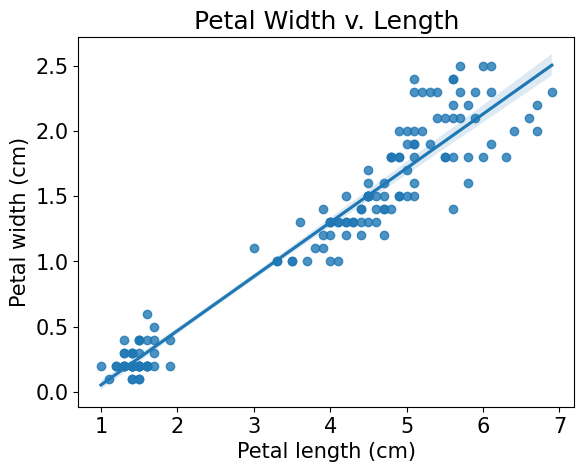

In [90]:
sns.regplot(data=data, x="petal length (cm)",y="petal width (cm)")
plt.title("Petal Width v. Length")
plt.xlabel('Petal length (cm)')
plt.ylabel('Petal width (cm)')

De lo anterior, podemos ver una relación **lineal**. Queremos cuantificar esta relación.

En la gráfica anterior $x$ es el Petal Lenght y $y$ es el Petal Width. Queremos ajustar un modelo a la forma
$\theta_1*x + \theta_0 = y$, la ecuación de la recta para generar nuestra regresión lineal.

Podemos utilizar scikit-earn para construir un modelo de regresión lineal como tenemos a continuación:



**NOTA:** aparecerá un molesto mensaje de error ya que scikit-learn espera un input 2D (N x 1) por eso llamamos "DataFrame" en el x-input para ajustar el comando.

In [91]:
# Importar un objeto de regresión lineal de sklearn.
model_1 = linear_model.LinearRegression()

# Ajustar el modelo a tus datos.
model_1.fit(pd.DataFrame(train.iloc[:, 2]), train.iloc[:, 3])

# Imprimir los coeficientes.
print("Coef\n", model_1.coef_)

# Imprimir el sesgo o bias.
print("\n\nBias\n", model_1.intercept_)


Coef
 [0.41490802]


Bias
 -0.357589314248546


El resultado anterior nos dice que $\theta_1$, la relación con el largo del pétalo, es $0.41$, y que el bias (también llamado interceptar) es $-0.36$

The above tells us that $\theta_1$, the relationship with petal length, is $0.41$, and that the bias (también llamado interceptar) is $-0.36$. En conjunto, esperamos que la fórmula se vea así:

$\theta_1 * x + \theta_0 = 0.41*x - 0.36 = y$ <br>

Grafiquemos esto para observarlo:

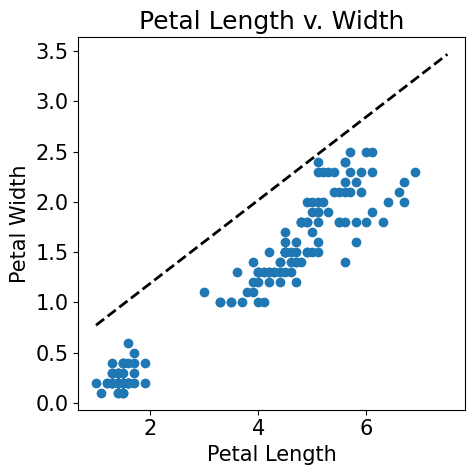

In [92]:
# Definimos variables para acceder de forma más simple a las columnas de nuestros features.
plength = data["petal length (cm)"]
pwidth = data["petal width (cm)"]

# Definimos un arreglo desde el valor mímimo del petal length hasta el máximo del petal lenght + 1, en pasos de 0.5.
xvals = np.arange(plength.min(), plength.max()+1, 0.5)

# Ecuación de nuestra regresión lineal.
yvals = model_1.coef_*xvals - model_1.intercept_

# Gráficamos nuestra recta con los datos y nuestra ecuación.
f = plt.figure(figsize=(5,5))
ax = f.add_subplot(1,1,1)
ax.scatter(plength, pwidth)
ax.plot(xvals, yvals, 'k', linewidth=2, linestyle='--')
ax.set_xlabel("Petal Length")
ax.set_ylabel("Petal Width")
ax.set_title("Petal Length v. Width")
f.tight_layout()

No es una mala relación! Podemos dar un paso más para cuantificar "qué tan bueno es el ajuste" utilizando dos métricas de rendimiento: el error cuadrático medio (MSE) y  R2 .

El valor de  R2  busca la correlación entre  x  y  y . Para este caso pregunta "qué tan bien se ajusta la línea a los puntos de nuestros datos".

Siempre queremos un MSE bajo y  R2  cercano a 1.  R2  está limitado de  0  (efectivamente no correlacionado) a  1  (relación perfecta).

Podemos calcular nuestras métricas de rendimiento prediciendo primero en nuestro conjunto de datos de pruebas y luego viendo qué tan buena es la estimación de nuestro modelo del ancho del pétalo cuando se usa la longitud del pétalo, en comparación con los valores reales del ancho del pétalo.

In [93]:
# Predicción con model_1 = linear_model.LinearRegression() utilizando los datos de prueba.
ypredict = model_1.predict(pd.DataFrame(test.iloc[:, 2]))

# Calculamos el MSE con los valores predichos en y.
print('MSE: %.2f'
      % mean_squared_error(pd.DataFrame(test.iloc[:, 3]), ypredict))

# Calculamos R^2 con los valores predichos en y.
print('R2: %.2f'
      % r2_score(pd.DataFrame(test.iloc[:, 3]), ypredict))

MSE: 0.04
R2: 0.94


## Regresión Logística

Similar a la regresión lineal, la regresión logística ajusta una "línea" con los coeficientes. Sin embargo, a diferencia de la regresión lineal, este modelo tiene como objetivo clasificar datos.

A partir del ancho de los pétalos, podemos ver que hay 3 comportamientos distintos de cada una de las especies de flores. Usando el largo/ancho del sépalo y el largo/ancho del pétalo, nos gustaría clasificar a qué especie de flor pertenece cada punto de datos.

Para hacer esto podemos emplear regresión logística. En la regresión logística binaria, estamos tratando de ajustar un logaritmo de relación impar; es decir, una probabilidad de una clase particular en relación con la otra clase.

En este problema hay 3 especies, por lo que la fórmula está ligeramente adaptada. Afortunadamente, scikit-learn puede manejar problemas de etiquetas binarias o de etiquetas múltiples con mucha facilidad.

Para construir un modelo de regresión logística se puede utilizar lo siguiente:

In [94]:
# Preparamos los datos de entrenamiento y prueba en x y y.
# La última columna es la etiqueta de la especie.
xtrain = train.iloc[:, :-1] # input, training
ytrain = train.iloc[:, -1] # output, training
xtest = test.iloc[:, :-1] # input, test
ytest = test.iloc[:, -1] # output, test

# Configuramos la regresión logística con el método de regresión logística de linear_model.
model_2 = linear_model.LogisticRegression()

# Ajustamos el modelo con los datos de entrenamiento.
model_2.fit(xtrain, ytrain)

/root/anaconda3/envs/env_python38/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [109]:
# Hacer predicciones con el conjunto de prueba.
ypred = model_2.predict(xtest)

# Probamos el accuracy del modelo generado
print("Testing accuracy =", accuracy_score(ytest, ypred))

Testing accuracy = 1.0


In [97]:
# Un ejemplo de la matriz de confusión con sklearn
#Importamos el método de matriz de confusión desde sklearn
from sklearn.metrics import confusion_matrix

#Aplicamos la matriz a nuestros valores de testing y los valores de predicción generados.
confusion_matrix(ytest, ypred)

array([[11,  0,  0],
       [ 0,  7,  0],
       [ 0,  0, 12]])

                    Predicted Class
                 |  0  |  1  |  2  |
-------------------------------------
Actual Class 0   |  11  |  0  |  0  |   <-- True negatives (TN) for class 0
Actual Class 1   |  0   |  7  |  0  |   <-- True positives (TP) for class 1
Actual Class 2   |  0   |  0  |  12 |   <-- True negatives (TN) for class 2



En scikit-learn, `penalty`  o penalización se refiere al tipo de regularización, normalmente **L1** or **L2**. Ambos métodos fomentan la escasez (lo que significa que muchos de los coeficientes delante de las características se acercan a 0). Además, la fuerza de la penalización inversa (regularización) es `C`. Una `C` grande indica una menor fuerza de penalización, así que disminuye gradualmente este valor mientras intentas encontrar los features más importantes.

## Árboles de decision

https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html?highlight=randomforest#sklearn.ensemble.RandomForestClassifier

https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestRegressor.html?highlight=randomforest#sklearn.ensemble.RandomForestRegressor

In [104]:
# Creamos el clasificador
clf = RandomForestClassifier(n_estimators=3)

# Entrenamos el modelo
clf.fit(xtrain, ytrain)

# Generamos predicción 
y_pred=clf.predict(xtest)

# Probamos el modelo con accuracy
print("Testing accuracy =", accuracy_score(ytest, y_pred))

Testing accuracy = 0.9666666666666667


## K-Means clustering

En el último enfoque, intentaremos ver si podemos ver patrones dentro de los datos usando KMeans. KMeans es un algoritmo de aprendizaje no supervisado, lo que significa que no se requieren etiquetas para entrenar.

Aquí, ya sabemos que hay 3 especies diferentes de flores, y hemos tenido muchos modelos de entrenamiento exitosos para reconocer estas especies. Sin embargo, en muchos problemas, es posible que no sepamos de antemano qué grupos pueden existir ya en los datos.

Para ello, KMeans sobresale. A continuación, usaremos un modelo de K-medias e intentaremos encontrar cuántos grupos hay.

Primero, inicializamos nuestro modelo KMeans. Existen muchos argumentos en la implementación de scikit-learn [aquí](https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html). Mientras que usaremos los por defecto, el principal a tomar en cuenta es `n_clusters` o cuántos grupos pensamos de antemano que hay en los datos. También usaremos `random_state`, pero eso es para asegurar la reproducibilidad.

Ten en cuenta que usaremos el conjunto de datos completo aquí, pero es posible encajar en un conjunto de entrenamiento y usar un conjunto de pruebas por separado para ver qué tan "robustos" son los clústeres.

Para simplificar la visualización, entrenaremos con `petal length` and `petal width`.

In [107]:
# Inicializamos el modelo KMeans.
k2model = KMeans(n_clusters=3, random_state=42)

# Ajustar todos los puntos de datos EXCEPTO para la especie.
k2model.fit(data[["petal length (cm)", "petal width (cm)"]])

# Calculamos e imprimimos la inercia desde el modelo de Kmeans.
print("Inertia =", k2model.inertia_)

# Cálculamos e imprimimos la posición de los clústers.
print("Centroids (x, y) =\n", k2model.cluster_centers_)

Inertia = 31.371358974358976
Centroids (x, y) =
 [[5.59583333 2.0375    ]
 [1.462      0.246     ]
 [4.26923077 1.34230769]]


/root/anaconda3/envs/env_python38/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


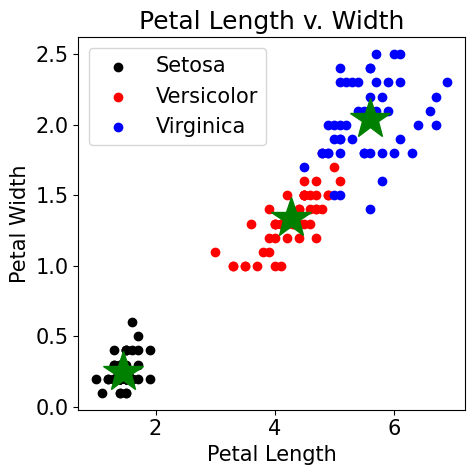

In [108]:
# Graficamos los datos con la línea para setosa.
f = plt.figure(figsize=(5,5))
ax = f.add_subplot(1,1,1)

# Setosa
ax.scatter(data[data.iloc[:, -1]==0]["petal length (cm)"],
           data[data.iloc[:, -1]==0]["petal width (cm)"],
           c='k')

# Versicolor
ax.scatter(data[data.iloc[:, -1]==1]["petal length (cm)"],
           data[data.iloc[:, -1]==1]["petal width (cm)"],
           c='r')

# Virginica
ax.scatter(data[data.iloc[:, -1]==2]["petal length (cm)"],
           data[data.iloc[:, -1]==2]["petal width (cm)"],
           c='b')

ax.legend(["Setosa", "Versicolor", "Virginica"])

# Graficamos los centroides de los clústers (output en Petal Length x Petal Width)
ax.plot(k2model.cluster_centers_[:,0],
        k2model.cluster_centers_[:,1],
        "g*", markersize=30)

ax.set_xlabel("Petal Length")
ax.set_ylabel("Petal Width")
ax.set_title("Petal Length v. Width")
f.tight_layout()